# Predicting Boston Housing Prices
The task associated with this dataset is to predict the house values in several Boston neighbourhoods in the 1970s, using information such as average number of rooms per dwelling,  % lower status of the population.


In [210]:
# External libraries

import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from math import sqrt

import datetime
import time
import os

# Visualization libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
from sklearn import datasets
boston = datasets.load_boston()

In [212]:
type(boston)

sklearn.utils.Bunch

In [213]:
# Fields are in the dictionary?
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [214]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [215]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [216]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [217]:
boston['data'].shape

(506, 13)

In [218]:
boston['target'].shape

(506,)

In [219]:
# Load the data
df_Boston = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [220]:
df_Boston['MEDV'] = boston['target']

In [221]:
df_Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [222]:
df_Boston.tail(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [223]:
df_Boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

All the variables are numerical.

In [224]:
len(df_Boston)

506

In [225]:
df_Boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [226]:
# check if any duplicate rows
df_Boston.duplicated().sum()

0

## Understanding the individual numerical variables in the dataset.

In [227]:
df_Boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


The equal count of all the columns confirms the findings from the missing value check.
The MEDV (median house values in 1000's) shows that house prices ranges from 5000 to 50,000 dollars.


In [228]:
# Focus on these columns
cols = ['RM','CRIM','DIS','PTRATIO','AGE','LSTAT', 'MEDV']

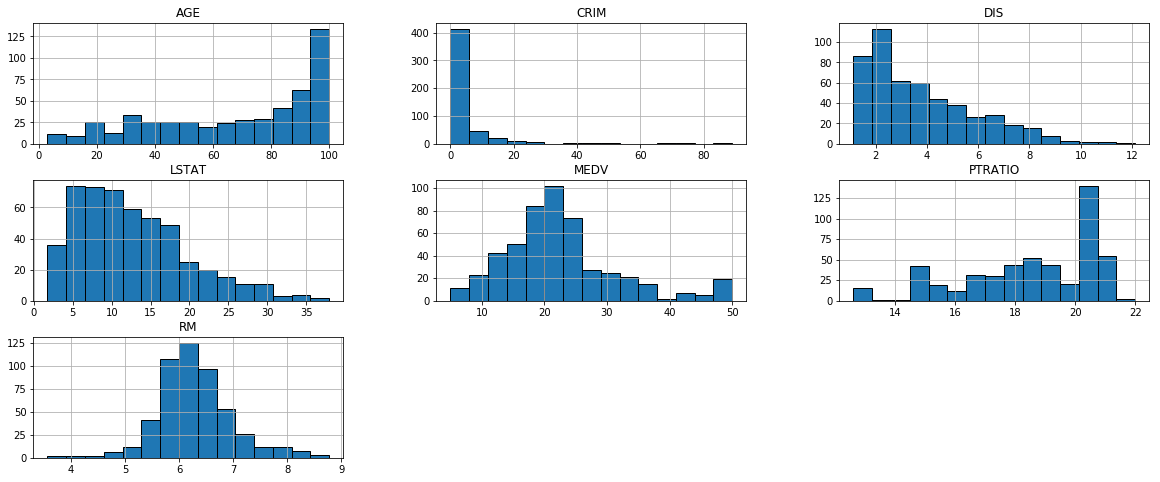

In [28]:
df_Boston[cols].hist(edgecolor= 'black', bins = 15, figsize = (20,8),layout = (3,3))
plt.show()

Looking at the histograms, the following is interpreted:

a: RM and MEDV have the closest shape to normal distributions.
b: AGE is skewed to the left. It means majority of neighbourhoods have around 90% of houses built prior to 1940.
c: LSTAT is skewed to the right. It shows that majority of neighbourhoods have 5% to 18% of lower status of the population.
d: The PTRATIO variable histogram shows that a large number of neughbourhoods have around 21 pupil-teacher ratio.



## Understanding the relations between variables

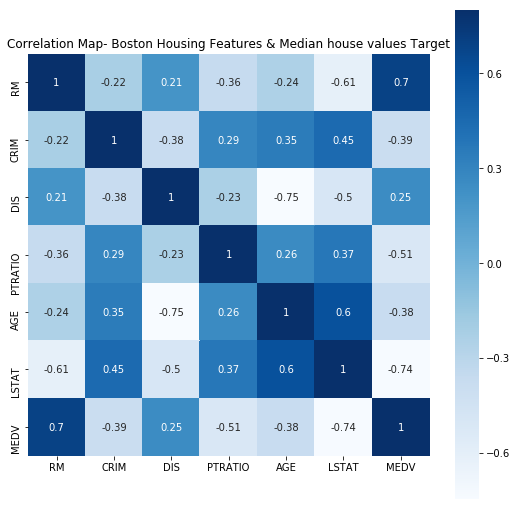

In [29]:
plt.subplots(figsize=(9, 9))

sns.heatmap(df_Boston[cols].corr(), vmax=.8, square=True, cmap="Blues", annot=True)
plt.title("Correlation Map- Boston Housing Features & Median house values Target")
plt.show()

This resulting table shows the correlation score between each set of values. Large positive scores indicate a strong positive (that is, in the same direction) correlation. It helps in understanding how the variables relate with the medv ( Median value of owner-occupied homes in $1000's).
Note how the number of rooms per house (RM) and the % of the population that is lower class (LSTAT) are highly correlated with the median house value (MDEV).
A strong positive correlation is seen between average number of rooms per dwelling(RM) and the target varible MEDV. It makes complete sense that as the number of rooms increase the house values increses.
Similarly a strong negative relation could be seen between LSTAT and MEDV.

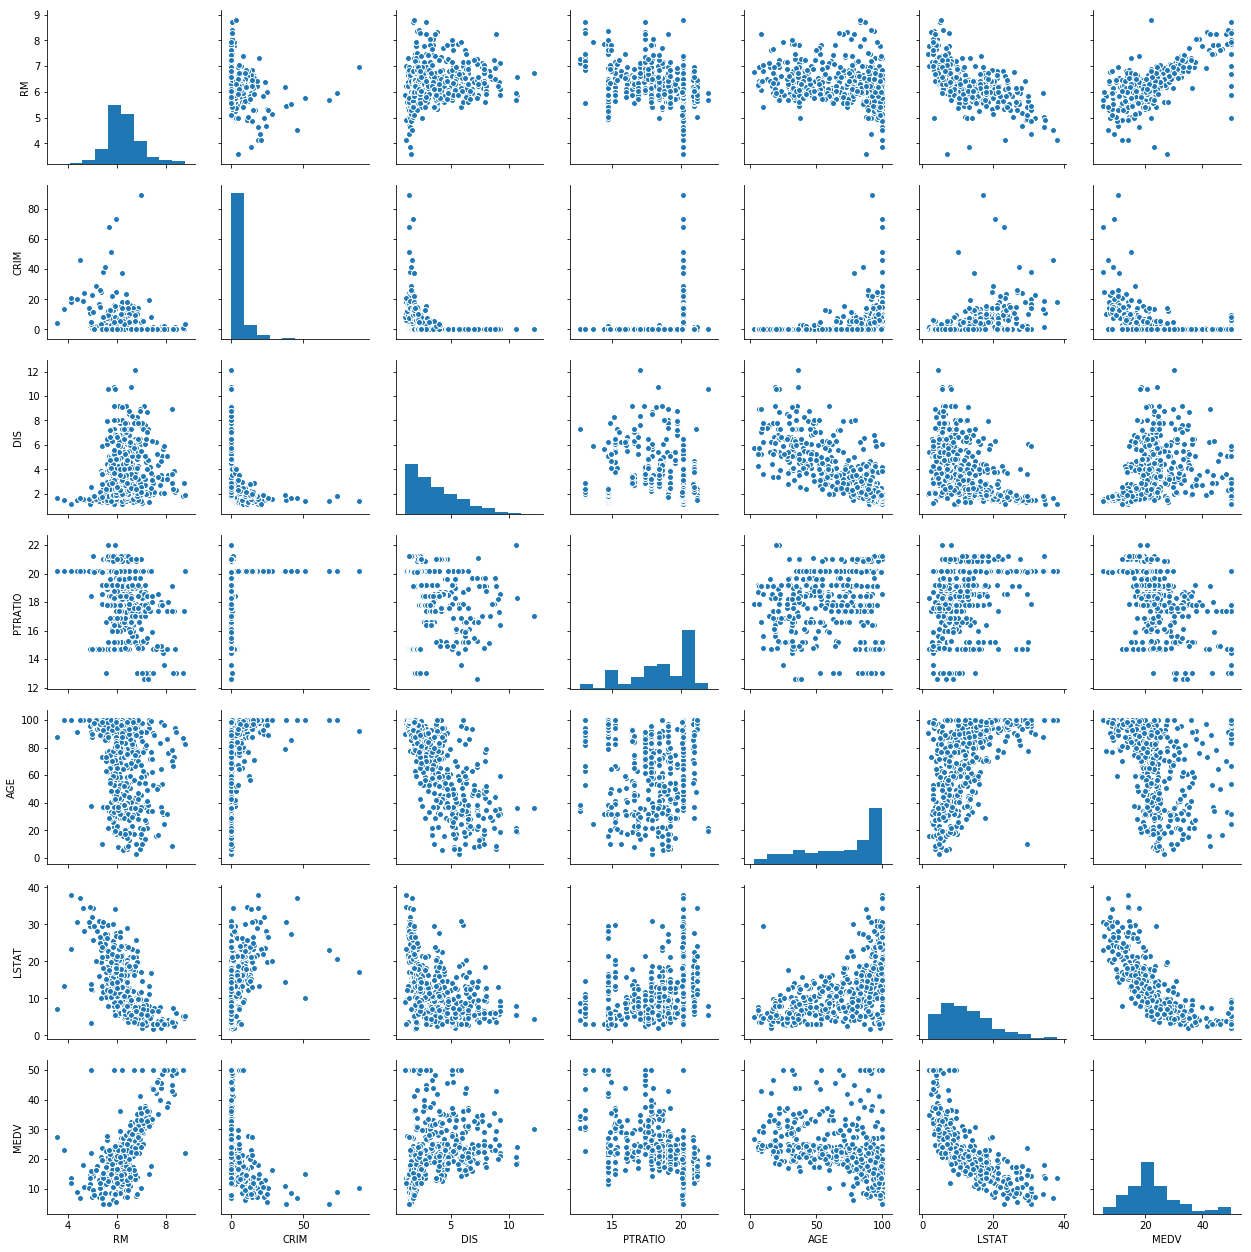

In [30]:
sns.pairplot(df_Boston[cols])

 The pair plot allows to see the relationships between variables in more detail. The number of rooms per house (RM) and the % of the population that is lower class (LSTAT) are highly correlated with the median house value (MDEV). Focusing on RM and LSTAT to predict MDEV.

## Train/Test Split

In [237]:
# Declaring Features and Target
features= ['RM','LSTAT']
target =  ['MEDV']

In [238]:
# Extracting Features and Target values into seperate dataframes.
x = df[features]
y = df[target]

In [245]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33,random_state= 20)

## Linear Regression: Fit a Model to the training set

In [248]:
lnregressor = LinearRegression()
lnregressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Calculate In-Sample and Out-of-Sample R^2 and Error

In [249]:
# Calculating tarining error
# Perform prediction on training data using model
y_train_prediction =lnregressor.predict(X_train)
RMSE = sqrt(mean_squared_error( y_train,  y_train_prediction))
print(RMSE)

5.2999249661515195


In [250]:
# Calculating test error
# Perform prediction on test data using model
y_test_prediction = lnregressor.predict(X_test)
RMSE = sqrt(mean_squared_error( y_test,y_test_prediction))
print (RMSE)

6.012293443189536


In [251]:
print("Training set R^2 score: {:.2f}".format(lnregressor.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(lnregressor.score(X_test, y_test)))

Training set R^2 score: 0.67
Test set R^2 score: 0.57


## Decision Tree Regressor

In [252]:
dsregressor= DecisionTreeRegressor(max_depth = 4)
dsregressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [253]:
# Perform prediction on training data using model 
y_train_prediction = dsregressor.predict(X_train)
RMSE = sqrt(mean_squared_error( y_train,  y_train_prediction))
print(RMSE)


3.3921216402319803


In [254]:
# Perform prediction on test data using model 
y_test_prediction= dsregressor.predict(X_test)
# Evaluate Decision tree regressor accuracy using RMSE
RMSE = sqrt(mean_squared_error( y_test,y_test_prediction))
print(RMSE)

5.508616640391562


In [255]:
print("Training set R^2 score: {:.2f}".format(dsregressor.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(dsregressor.score(X_test, y_test)))

Training set R^2 score: 0.86
Test set R^2 score: 0.64


### To quantify model's performance

For both Linear Regression and Decision Tree model, calculated training error and test error to get an accurate picture as to how model is doing. Also calculated coefficient of determination R^2 to describe how "good" the model is at making predictions.

Linear Regression Model: It’s no surprise that R^2 is higher in-sample (0.67) compared to (0.57) out of sample. It means that 57% of the target variable MEDV, using this model, can be explained by the features RM and LSTAT. 

Decision Tree Model: It shows that 64% of the target variable MEDV, using this model, can be explained by the features RM and LSTAT.

The RMSE for the Training data and the Test data in both models proves that the models are far away from any overitting or underfitting.

Choosing Decision Tree model over Linear Regresson model for its comparatively low RMSE on Test data and higher R^2 score.